In [40]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [41]:
df = pd.read_csv("../datasets/placement.csv")

df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


### Steps

0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [42]:
# pre-processing
df = df.iloc[:, 1:]

df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


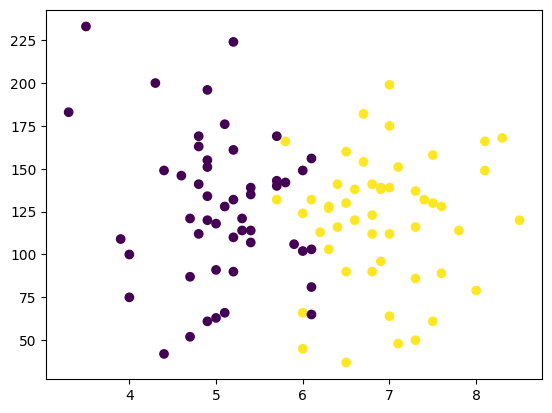

In [44]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [45]:
X = df.iloc[:, :2]

X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [46]:
y = df.iloc[:, -1]

y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [48]:
X_train

,cgpa,iq
35,6.8,90.0
92,5.2,110.0
7,5.0,63.0
42,7.6,89.0
4,5.8,142.0
...,...,...
5,7.1,48.0
79,6.5,90.0
71,6.1,132.0
86,5.1,128.0


In [49]:
X_test

,cgpa,iq
76,4.9,155.0
97,6.7,182.0
15,5.1,176.0
78,6.1,81.0
6,5.7,143.0
23,4.7,87.0
87,5.7,132.0
96,4.4,42.0
18,4.0,100.0
65,8.1,166.0


In [50]:
y_train

35    1
92    0
7     0
42    1
4     0
     ..
5     1
79    1
71    1
86    0
24    0
Name: placement, Length: 90, dtype: int64

In [51]:
y_test

76    0
97    1
15    0
78    0
6     0
23    0
87    1
96    0
18    0
65    1
Name: placement, dtype: int64

In [52]:
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

X_train

array([[ 0.67435587, -0.84896487],
       [-0.74741932, -0.33856515],
       [-0.92514122, -1.53800449],
       [ 1.38524347, -0.87448485],
       [-0.21425362,  0.4780744 ],
       [ 2.18499202, -0.08336529],
       [ 0.76321682, -0.69584495],
       [-1.01400217,  0.27391452],
       [ 1.38524347,  0.1207946 ],
       [ 0.76321682,  0.40151445],
       [ 0.23005113,  0.1207946 ],
       [ 0.23005113, -0.51720505],
       [ 1.11866062,  0.35047447],
       [ 0.67435587, -0.28752518],
       [-1.45830692,  0.65671431],
       [-0.74741932,  2.57071326],
       [-1.28058502,  0.58015435],
       [ 1.29638252,  0.17183457],
       [-0.03653172, -1.46144453],
       [-0.56969742,  0.40151445],
       [-2.25805547,  2.80039313],
       [ 0.76321682,  0.37599446],
       [ 0.85207777, -0.28752518],
       [-0.30311457,  1.16711403],
       [ 0.49663397,  0.37599446],
       [ 0.40777302, -2.20152413],
       [ 1.11866062, -0.18544523],
       [-1.10286312, -0.28752518],
       [ 0.05232923,

In [54]:
X_test = scaler.transform(X_test)

X_test

array([[-1.01400217,  0.80983422],
       [ 0.58549492,  1.49887385],
       [-0.83628027,  1.34575393],
       [ 0.05232923, -1.07864474],
       [-0.30311457,  0.50359439],
       [-1.19172407, -0.92552483],
       [-0.30311457,  0.22287454],
       [-1.45830692, -2.0739242 ],
       [-1.81375072, -0.59376501],
       [ 1.82954822,  1.09055407]])

In [55]:
clf = LogisticRegression()

In [56]:
clf.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_predict = clf.predict(X_test)

In [58]:
y_test

76    0
97    1
15    0
78    0
6     0
23    0
87    1
96    0
18    0
65    1
Name: placement, dtype: int64

In [59]:
accuracy_score(y_test, y_predict)

0.8

<Axes: >

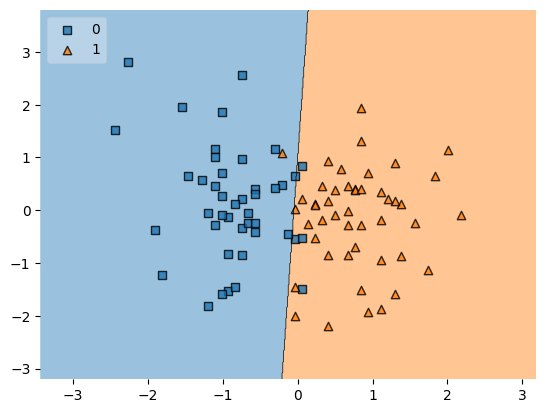

In [60]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)